### Induwara Senadheera 
### 190574U

In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


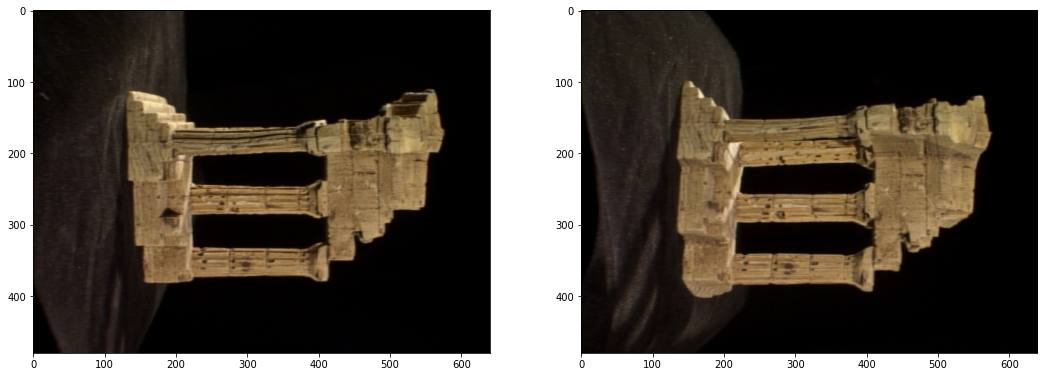

In [7]:
# Question 01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
f = open(r'./Images//templeSparseRing/templeSR_par.txt')
assert f is not None
n= int(f.readline())
l=f.readline().split()
im1_fn=l[0]
k1=np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1=np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1=np.array([float(i) for i in l[19:22]]).reshape((3,1))
l=f.readline().split()
im2_fn=l[0]
k2=np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2=np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2=np.array([float(i) for i in l[19:22]]).reshape((3,1))
im1= cv.imread(r'./Images//templeSparseRing/' + im1_fn,cv.IMREAD_COLOR)
im2= cv.imread(r'./Images//templeSparseRing/' + im2_fn,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
fig, ax = plt.subplots( 1, 2, figsize = (18, 8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
plt.show()

In [8]:
# Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
sift = cv.xfeatures2d.SIFT_create()
kp1, decs1 = sift.detectAndCompute(im1, None)
kp2, decs2 = sift.detectAndCompute(im2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm =FLANN_INDEX_KDTREE, trees = 5 )
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(decs1, decs2, k=2)
good = []
pts1 = []
pts2 = []
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)
pts1 = np.array(pts1)
pts2 = np.array(pts2)
F,mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)
print ("F:\n",F)
E = k2.T @ F @ k1
print ("E:\n",E)
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k1)
R_t_1 = np.concatenate((R1, t1), axis =1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_, t2_), axis =1)
P1 = k1 @ np.hstack((R1, t1))
P2_ = k2 @ R_t_2

F:
 [[ 5.89765040e-07  2.55977675e-06 -3.07847061e-02]
 [ 5.16444015e-06 -3.34348162e-07 -1.30738862e-03]
 [ 2.85158915e-02 -2.54311096e-03  1.00000000e+00]]
E:
 [[ 1.36331040e+00  5.93862667e+00 -4.55731937e+01]
 [ 1.19813894e+01 -7.78486500e-01  2.61515449e-01]
 [ 4.55650723e+01 -2.82563077e+00 -2.64674836e-02]]


In [9]:
# Question 03-04
sift = cv.xfeatures2d.SIFT_create()
kp1, decs1 = sift.detectAndCompute(im1, None)
kp2, decs2 = sift.detectAndCompute(im2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm =FLANN_INDEX_KDTREE, trees = 5 )
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(decs1, decs2, k=2)
good = []
pts1 = []
pts2 = []
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)
pts1 = np.array(pts1)
pts2 = np.array(pts2)
F,mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)
print ("F:\n",F)
E = k2.T @ F @ k1
print ("E:\n",E)
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k1)
R_t_1 = np.concatenate((R1, t1), axis =1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_, t2_), axis =1)
P1 = k1 @ np.hstack((R1, t1))
P2_ = k2 @ R_t_2

F:
 [[ 1.19353197e-06  1.48128487e-05 -2.65668422e-02]
 [-8.37167541e-06  6.34793204e-07  2.04080864e-03]
 [ 2.41439516e-02 -5.73622910e-03  1.00000000e+00]]
E:
 [[ 2.75898779e+00  3.43654884e+01 -3.42837514e+01]
 [-1.94221058e+01  1.47803397e+00 -5.08742503e-01]
 [ 3.41148335e+01 -1.68046954e+00 -1.62748485e-02]]


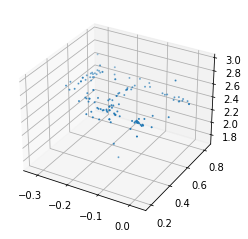

In [10]:
# Question 05
points4d = cv.triangulatePoints(P1, P2_, pts1.T, pts2.T)
points4d /= points4d[3, :]
import matplotlib.pyplot as plt
X = points4d[0, :]
Y = points4d[1, :]
Z = points4d[2, :]
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=1, cmap='gray')
plt.show()